In [343]:
import pandas as pd
import numpy as np


### 2. Khám phá dữ liệu

In [344]:
df = pd.read_csv('../AB_NYC_2019.csv', sep = ',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Bộ dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [345]:
rows = len(df)
cols = len(df.iloc[0])
rows, cols

(48895, 16)

Như vậy, bộ dữ liệu có tổng cộng 48895 dòng và 16 cột. Bây giờ, ta sẽ tìm hiểu ý nghĩa của các cột. Theo file mô tả của bộ dữ liệu, ta có được các ý nghĩa của các cột như sau:
- id: id của nơi ở được liệt kê
- name: tên của nơi ở được liệt kê
- host_id: tên của người sở hữu nơi ở được liệt kê
- neighborhood_group: tên của quận ở New York
- neighborhood: tên của một phường ở New York
- latitude: Vĩ độ của nơi ở được liệt kê
- longtitude: kinh độ của nơi ở được liệt kê
- room_type: loại phòng được thuê
- price: giá của từng nơi ở được liệt kê
- minimum_nights: số lượng đêm ngủ lại nhỏ nhất ở trong nơi ở được liệt kê
- number_of_reviews: lượng đánh giá, nhận xét của từng nơi ở được liệt kê
- last_review: ngày đánh giá cuối cùng của nơi ở được liệt kê
- reviews_per_month: Trung bình lượt review mỗi tháng
- calculated_host_listings_count: số lần mà mỗi chủ sỡ hữu sở hữu nơi ở được liệt kê
- availability_365: số ngày mà nơi ở được liệt kê có sẵn trong năm

Sau khi có được ý nghĩa của mỗi cột, ta sẽ tiến hành kiểm xem có dòng nào bị trùng không?

In [346]:
np.sum(df.duplicated(subset=None, keep="first")==True)

0

Như vậy, không có dòng nào bị lặp. Ta sẽ xem thử ý nghĩa của từng dòng. Từ dữ liệu của `df`, ta thấy rằng mỗi dòng dữ liệu cho biết tình trạng của một nơi ở, mỗi phần tử ứng với một cột ở trên.

Tiếp đến, ta sẽ tìm hiểu về kiểu dữ liệu của mỗi cột. 

In [347]:
a = lambda x: x.dtype
print(df.agg(a, axis=0))

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Dựa trên các dữ liệu ở trên, ta thấy có 3 kiểu dữ liệu chính:
- Đối với dữ liệu dạng `int64`: `id, host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365`. Như vậy, các dữ liệu dạng số nguyên không có vấn đề gì.
- Đối với dữ liệu dạng `float64`: `latitude, longitude, reviews_per_month`. Như vậy, dữ liệu dạng số thực cũng không có vấn đề gì.
- Đến với dữ liệu dạng `object`: `name, host_name, neighbourhood_group, neighbourhood, room_type, last_review`. Ta thấy rằng ngoài last_review, các cột dữ liệu còn lại đều là dạng string. Ta có thể sẽ chuyển cột last_review thành dạng datetime để dễ làm việc hơn.

In [348]:
df.describe(include=[np.number])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Đối với các cột dữ liệu dạng số, ta sẽ cùng đi tìm hiểu:
  - Cột `id`: giá trị nhỏ nhất là 2539 và lớn nhất là 3648724 ... không có gì bất thường. Cột này có tổng dữ liệu là 48895 dòng, trùng với số dòng ở trên nên cũng không có giá trị bị thiếu.
  - Cột `host_id`: tương tự cột `id`, `host_id` kéo dài từ 2438 đến 27432130 và không bị thiếu dòng nào.
  - Cột `latitude` và `longitude`: dao động trong khoảng `(40.72, -73.95)` và không bị thiếu giá trị nào. Có vẻ hợp lí bởi ta chỉ xét riêng cho NewYork, nên giá trị kinh độ và vĩ độ sẽ bị lệch khá ít.
  - Cột `price`: nhỏ nhất là 0$ (free) và lớn nhất là 10000$. Mean là 152.72 và không bị thiếu dòng giá trị nào. Cột dữ liệu này cũng không có gì bất thường.
  - Cột `minimum_nights`: giá trị cho thuê nhỏ nhất của một nơi ở là 1 và lớn nhất là 1250 đêm. Điều này cũng có vẻ hợp lí, bởi đối với các nơi ở cho thuê ít nhất 1 đêm, đây có thể để phục vụ du lịch. Còn đối với nơi ở cho thuê ít nhất 1250 ngày, đây có thể là một cơ sở làm việc hay một toà nhà,... Cột này cũng không có giá trị bị thiếu.
  - Cột `number_of_reviews`: giá trị trong khoảng [0,629]. Có thể có một số nơi, lượt review là 0, và một số nơi phổ biến, lượt nhận xét là rất cao. Dữ liệu này cũng bình thường.
  - Cột `reviews_per_month`: cột này có giá trị nhỏ nhất là 0.01 và lớn nhất là 58.5. Ta thấy rằng, cột `number_of_reviews`, có một số nơi không có đánh giá nào và cột `reviews_per_month`, giá trị nhỏ nhất là một số khác 0. Tỉ lệ của cột này cũng khá cao, nên có thể suy ra rằng có một số nơi không được đánh giá nào thì cột này sẽ để trống. Ta sẽ điền các giá trị bị thiếu ở cột này ở mục tiền xử lí.
  - Cột `calculated_host_listings_count`, nhỏ nhất là 1 và lớn nhất là 327, số cột bị thiếu là 0. Cột này có vẻ không có gì bất thường.
  - Cuối cùng, cột `availability_365`, giá trị nhỏ nhất là 0, lớn nhất là 365. Không có cột nào bị thiếu. Dữ liệu ở cột này cũng phù hợp với số ngày trong năm.

In [349]:
df.describe(include=[object])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Cuối cùng, đối với các cột dữ liệu dạng chữ:
- Đối với cột `name`: Cột này bị thiếu 6 giá trị, có 47905 giá trị khác nhau, và có tới 18 tên Hillside Hotel. Bởi vì không có dòng nào bị lặp, nên đây có thể là một điểm bất thường.
- Cột `host_name`: có 11452 giá trị khác nhau và thiếu 11 giá trị. Host sở hữu nhiều nơi ở nhất là Michael, với 417 nơi ở. Có một số giá trị bị thiếu, đây có thể là do nơi ở đó không của host nào? Điều này khá bất hợp lí.
- Cột `neighborhood_group`: bộ dữ liệu chỉ xét trên 5 quận của New York, với Mahattan là quận có nhiều nơi ở nhất. Cột này cũng không có giá trị bị thiếu, và là cột khá bình thường.
- Cột `neighborhood`: cột này cũng không có giá trị bị thiếu và Williamsburg là phường có nhiều nơi ở nhất, với 3920 nơi ở.
- Cột `room_type`: không có giá trị bị thiếu, và cột này có 3 giá trị phân biệt. Điều này cũng không có gì bất thường.
- Và cuối cùng, cột `last_review`, số cột bị thiếu là khá cao và có 1764 giá trị phân biệt. Điều này khá hợp lí, bởi có thể một nơi ở nếu để lâu thì các giá trị này sẽ rải đều ra các năm, không chỉ riêng năm 2019. Cột last_review này cũng khá giống cột `reviews_per_month`, nên 2 cột này có gì đó liên quan đến nhau...

# IV. TIỀN XỬ LÝ DỮ LIỆU

### Chuyển đổi dtype cho cột last review

In [350]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review']

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

Dựa vào phần khám phá dữ liệu, ta thấy rằng tồn tại những khác sạn có trùng tên và có vị trí ở các neigborhood khác nhau. Chính điều này sẽ gây ra việc trùng lặp.
Hơn nữa, có những mẫu, mặc dù cùng mô tả về cùng 1 địa điểm nhưng lại tồn tại nhiều lần. Thế nên, ta cần xử lí trùng lắp.

Trước hết, ta sẽ lấy các mẫu có cùng tên để xem xét.

In [351]:
duplicated_name = df['name'].value_counts()#.loc[lambda x: x>1]
duplicated_name

Hillside Hotel                                    18
Home away from home                               17
New york Multi-unit building                      16
Brooklyn Apartment                                12
Private Room                                      11
                                                  ..
Spacious and stylish Soho 1-Bedroom                1
COMFY SOFA BED IN MY 1 BEDROOM APT!                1
Historic Townhouse Apartment with Garden Oasis     1
Artsist's NYC Downtown Luxury Loft                 1
Room in uptonw manhattan                           1
Name: name, Length: 47905, dtype: int64

Ta sẽ xóa các mẫu dựa có cùng tên, cùng neighbourhood và neighbourhood_group.

df= df.drop_duplicates(subset=['name','neighbourhood','neighbourhood_group'])

### XỬ LÝ CÁC CỘT BỊ THIẾU DỮ LIỆU

df.info()

Đối với cột name, như đã thấy ở phần khám phá dữ liệu, dữ liệu tồn tại các mẫu không có tên cho địa điểm, điều này cũng không có gì quá bất thường, và đối với các mẫu này ta không cần thiết phải lấp vào. Bởi lẽ, việc làm đầy dữ liệu cột này là không hiệu quả.

In [352]:
df[df['name'].isna()]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaT,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaT,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaT,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaT,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaT,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaT,NaN,5,0


In [353]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


Đối với cột `host_name`, ta có điền dữ liệu dựa trên các mẫu có cùng host_id, tuy nhiên khi kiểm tra sơ lược thì ta thấy các host_id này chỉ xuất hiện 1 lần, thế nên việc điền dữ liệu thiếu này cũng không khả thi.

df['host_name']= df.groupby(['host_id'])['host_name'].ffill()
df['host_name'].count()

Đối với cột `last_review`, dữ liệu cột này cần tính xác thực, thế nên ta không cần phải làm đầy. Cuối cùng là cột `reviews_per_month`, ta sẽ điền giá trị 0 cho các mẫu bị thiếu.

In [354]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# V. Trả lời câu hỏi

### 2. Với từng loại phòng, ta nên chọn khu vực nào để thuê?

Để chọn được loại phòng tốt nhất, ta sẽ tiến hành thực hiện theo các bước sau:
- Bước 1: Gom nhóm theo loại phòng, khu vực (ở đây là quận)
- Bước 2: Lấy giá trị trung bình theo cột giá và lưu lại giá trị vào các biến
- Bước 3: Tiến hành trực quan hoá để có được cái nhìn tổng quát nhất

Ngoài ra, để có cái nhìn rõ ràng hơn nữa về từng quận, ta sẽ tiến hành gom nhóm theo `loại phòng, Quận và phường`

Trước tiên, ta sẽ tính giá nhà trung bình theo các loại phòng khác nhau, theo từng Quận. Từ đó, ta sẽ chọn ra được Quận có giá nhà tốt nhất. Giả sử thứ tự được sắp xếp theo `Entire home/apt, Private room, Shared room`

In [355]:
neigh_group = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens'\
                        , 'Staten Island']
overall = df.groupby(['room_type', 'neighbourhood_group'])['price'].agg(['mean']).unstack(1)

type = [overall.loc['Entire home/apt'].idxmin()[1], overall.loc['Private room'].idxmin()[1],\
        overall.loc['Shared room'].idxmin()[1]]
vals = [overall.loc['Entire home/apt'].min(), overall.loc['Private room'].min(),\
        overall.loc['Shared room'].min()]
type

['Bronx', 'Staten Island', 'Brooklyn']

Tiếp đến, tiến hành trực quan hoá dữ liệu thu được để có thể trả lời câu hỏi

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Entire home/apt each neighbourhood groups')

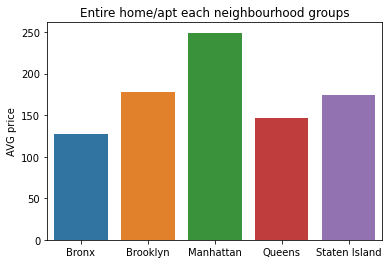

In [357]:
ax = sns.barplot(x=neigh_group, y=list(overall.loc['Entire home/apt'].values))
ax.set_ylabel('AVG price')
ax.set_title('Entire home/apt each neighbourhood groups')

> Kết luận: Đối với loại phòng `Entire home/apt`, có thể thấy rằng giá cả ở `Bronx` khá rẻ so với phần còn lại. Vì vậy sẽ tốt hơn cho khách hàng nếu chọn loại phòng này ở `Bronx`

Text(0.5, 1.0, 'Private room each neighbourhood groups')

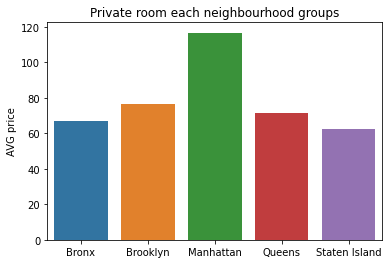

In [358]:
ax = sns.barplot(x=neigh_group, y=list(overall.loc['Private room'].values))
ax.set_ylabel('AVG price')
ax.set_title('Private room each neighbourhood groups')

> Kết luận: Đối với loại phòng `Private room`, giá cả ở 2 khu `Bronx` và `Staten Island` khá tương đồng nhau. Người dùng có thể chọn nơi ở ở 2 khu này để có thể tiết kiệm chi phí

Text(0.5, 1.0, 'Shared room each neighbourhood groups')

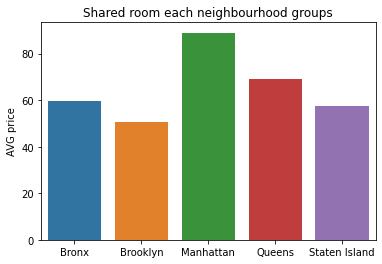

In [359]:
ax = sns.barplot(x=neigh_group, y=list(overall.loc['Shared room'].values))
ax.set_ylabel('AVG price')
ax.set_title('Shared room each neighbourhood groups')

> Kết luận: Nếu người dùng muốn thuê phòng để ở lâu dài, loại phòng `Shared room` sẽ là một lựa chọn tốt. Dựa vào đồ thị, `Brooklyn` là khu có giá rẻ nhất so với các khu còn lại

Cụ thể hơn nữa, nếu du khách chỉ muốn đến ở một quận nhất định, ta sẽ cùng chọn ra phường có giá cả hợp túi tiền nhất. Để làm được, ta sẽ gom nhóm theo Quận, phường và loại phòng, từ đó lấy trung bình theo giá cả 

In [390]:
neigh_group = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens'\
                        , 'Staten Island']

temp = df.groupby(['neighbourhood_group','neighbourhood', 'room_type'])['price'].agg(['mean']).unstack(1)
detailed_df = pd.DataFrame(index=['Entire home/apt', 'Private room', 'Shared room'],\
                      columns=['Bronx', 'Brooklyn', 'Manhattan', 'Queens'\
                            , 'Staten Island'])
for neigh in neigh_group:

    temp1 = temp.loc[neigh].dropna(axis = 1)
    a = temp1.agg('idxmin', axis=1)

    detailed_df.loc['Entire home/apt', neigh] = a.values[0][1] \
        + ',' + temp.loc[neigh].loc['Entire home/apt', ('mean',a.values[0][1])].round(2).astype('str')
    detailed_df.loc['Private room', neigh] = a.values[1][1] \
        + ',' + temp.loc[neigh].loc['Private room', ('mean',a.values[1][1])].round(2).astype('str')
    detailed_df.loc['Shared room', neigh] = a.values[2][1] \
        + ',' + temp.loc[neigh].loc['Shared room', ('mean',a.values[2][1])].round(2).astype('str')
detailed_df  


,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Entire home/apt,"Woodlawn,65.5","Midwood,100.43","Inwood,117.63","Queens Village,103.91","Clifton,91.25"
Private room,"Van Nest,36.67","Borough Park,53.55","Washington Heights,66.1","Woodhaven,53.94","Concord,44.95"
Shared room,"Morris Heights,20.0","Flatlands,24.5","Roosevelt Island,43.33","South Ozone Park,31.0","Randall Manor,13.0"


> Dựa vào bảng số liệu, nếu người dùng chỉ muốn ở một quận nhất định ở New York, ta sẽ có từng phường tương ứng với từng quận, có giá nơi ở rẻ nhất. Có thể dựa trên bảng này để chọn ra một nơi ở hợp lí nhất.

### 4. Giả sử ta có chuyến công tác trong vòng 10 ngày ở thành phố New York, thì ta nên chọn nhà của host nào là lợi cho mình nhất?

Để trả lời câu hỏi trên, ta sẽ tiến hành phân tích theo các bước sau:
- Bước 1: Chọn ra trong data số dòng dữ liệu có `minimum_nights = 10 và price !=0`
- Bước 2: Gom nhóm theo thông tin của host `(host_id, host_name)`
- Bước 3: Lấy tổng theo cột `number_of_reviews` để chọn ra host có số lượt reviews nhiều nhất (điều này xảy ra bởi một căn nhà có nhiều lượt review, nghĩa là nhà đó được nhiều khách sử dụng --> Chất lượng sẽ tốt hơn )
- Bước 4: Trực quan hoá dữ liệu thu được để có thể trả lời câu hỏi

Trước tiên, ta sẽ thực hiện Bước 1, 2 3 chung với nhau, và thu được kết quả như dưới đây:

In [382]:
host_with_review = df[(df['minimum_nights'] <= 10) & (df['price']!=0)].groupby(['host_id', 'host_name'])\
    ['number_of_reviews'].agg(['sum'])
host_with_review.sort_values('sum', ascending=False)
top_host = host_with_review.sort_values('sum', ascending=False).head(10)
top_host

,,sum
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
4734398,Jj,1798
16677326,Alex And Zeena,1355
6885157,Randy,1346
23591164,Angela,1269


Tiếp theo, ta sẽ tiến hành trực quan bảng dữ liệu trên để dễ quan sát

Text(0.5, 1.0, 'Top hosts with total reviews')

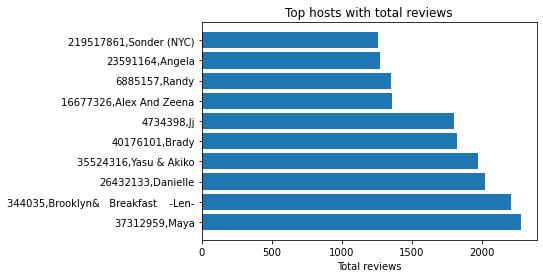

In [389]:
vals = []
for i in top_host.values:
    vals.append(i[0])
key = [top_host.index[i][0].astype(str) + ',' + top_host.index[i][1] for i in range (len(top_host))]
plt.barh(key, vals)
plt.xlabel('Total reviews')
plt.title('Top hosts with total reviews')

> Kết luận: Dựa vào số lượt đánh giá, có thể thấy 2 host có id `344035` và `37312959` là 2 host có vẻ đắt khách nhất. Người dùng nên cân nhắc sử dụng nơi ở của 2 host này để có thể có trải nghiệm tốt nhất. Ngoài ra, các host nằm trong top 10 đều có tổng lượt review trên 1000. Có thể dựa trên khu vực muốn ở và dựa trên cả nơi ở do host quản lí để chọn được chỗ phù hợp với mình.